###### Note: Hyperparameter tuning is an extensive process, it may take 20-40 mins to execute the whole notebook.

# Predictive Modeling of Healthy Life Expectancy at Birth

## Team Members

• [Aoi Minamoto](mailto:minamoto@iu.edu)

• [Avinash Pawar](mailto:avipawar@iu.edu)

• [Harshwardhan Patil](mailto:Hrpatil@iu.edu)

#### Let's load some of the required libraries first

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_happiness_data(csv_path):
    return pd.read_csv(csv_path)

In [3]:
happiness_data = load_happiness_data("happiness_data.csv")

#### Task 1 : Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

We will see how the data Looks like:

In [4]:
happiness_data.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [5]:
happiness_data.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1860.000000                1839.000000      1927.000000   
mean      0.000103                   0.747125         0.710003   
std       0.162215                   0.186789         0.107100   
min      -0.335000                   0.035000         0.322000   
25%      -0.113000                   0.690000         0.625500   
50%      -0.025500                   0.802000         0.722000   
75%       0.091000                   0.872000         0.799000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1933.000000  
mean          0.268544  
std           0.085168  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.705000

and now, we will see the dataset and it's attribute information

In [6]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


### Observations : 

1. There is about 1949 entries in the datasets(rows) and 11 features (columns)
2. Country attribute has categorical values as its datatype is object
3. Year has descrete integer values, that can also be called as categorical
4. Also, out of 11 features, it looks like 8 features have some missing values which need to be taken care of.

### Task 2 a: Display  the  statistical  values  for  each  of  the  attributes,  along  with  visualizations  

So, how many null values are there and in which columns. Let's find out.

In [7]:
happiness_data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

So, certainely there are null values present in the data. We will take care of these values in data cleaning step.

Lets get more information on the data.

In [8]:
happiness_data.describe(include='all')

Country name         year  Life Ladder  Log GDP per capita  \
count          1949  1949.000000  1949.000000         1913.000000   
unique          166          NaN          NaN                 NaN   
top        Zimbabwe          NaN          NaN                 NaN   
freq             15          NaN          NaN                 NaN   
mean            NaN  2013.216008     5.466705            9.368453   
std             NaN     4.166828     1.115711            1.154084   
min             NaN  2005.000000     2.375000            6.635000   
25%             NaN  2010.000000     4.640000            8.464000   
50%             NaN  2013.000000     5.386000            9.460000   
75%             NaN  2017.000000     6.283000           10.353000   
max             NaN  2020.000000     8.019000           11.648000   

        Social support  Healthy life expectancy at birth  \
count      1936.000000                       1894.000000   
unique             NaN                               NaN   
top                NaN                               NaN   
freq               NaN                               NaN   
mean          0.812552                         63.359374   
std           0.118482                          7.510245   
min           0.290000                         32.300000   
25%           0.749750                         58.685000   
50%           0.835500                         65.200000   
75%           0.905000                         68.590000   
max           0.987000                         77.100000   

        Freedom to make life choices   Generosity  Perceptions of corruption  \
count                    1917.000000  1860.000000                1839.000000   
unique                           NaN          NaN                        NaN   
top                              NaN          NaN                        NaN   
freq                             NaN          NaN                        NaN   
mean                        0.742558     0.000103                   0.747125   
std                         0.142093     0.162215                   0.186789   
min                         0.258000    -0.335000                   0.035000   
25%                         0.647000    -0.113000                   0.690000   
50%                         0.763000    -0.025500                   0.802000   
75%                         0.856000     0.091000                   0.872000   
max                         0.985000     0.698000                   0.983000   

        Positive affect  Negative affect  
count       1927.000000      1933.000000  
unique              NaN              NaN  
top                 NaN              NaN  
freq                NaN              NaN  
mean           0.710003         0.268544  
std            0.107100         0.085168  
min            0.322000         0.083000  
25%            0.625500         0.206000  
50%            0.722000         0.258000  
75%            0.799000         0.320000  
max            0.944000         0.705000

The above data gives general summarry of the data. However, the other attributes show that, every feature is measured on the different scale. So, in order to proceed further we also have to make all the features on the same scale.

Now we will look at the general distribution of the attributes.

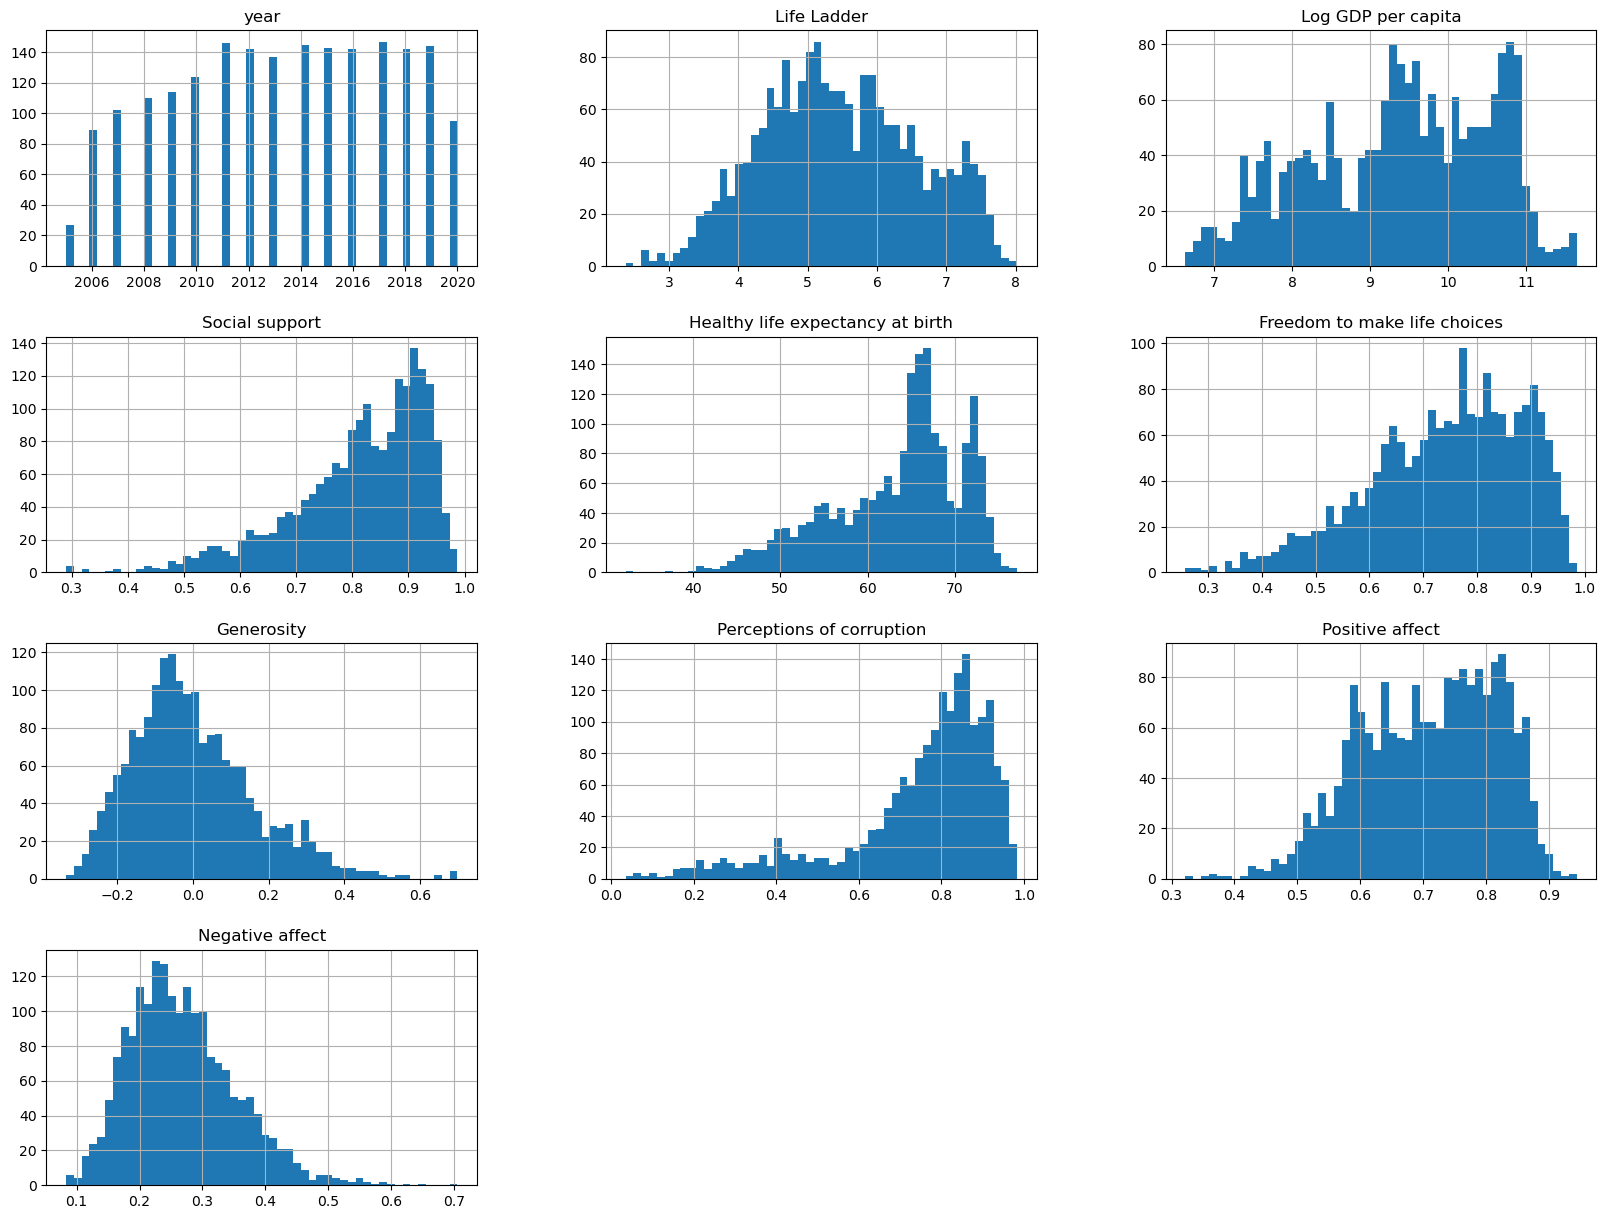

In [9]:
happiness_data.hist(bins = 50, figsize=(20,15))
plt.show()

Looking at the above plots, it appears that each variable comes from different distribution. Attributes such as social support, freedom to make life choices, percentage of curruption are leftly skewed, whereas the positive affect and log GDP criteria show kind of similar traits in their distribution.

Clearly, the data is on different scale and for our machine learning model to perform well, all these attributes must be on the same scale.

#### Task 3 : Analyze and discuss the relationships between the data attributes, and between the data attributes  and  label. 

#### Here, Healthy life expectancy at birth is the label and rest of them are features. 

##### Relationship between Healthy life expectancy and log GDP per capita :

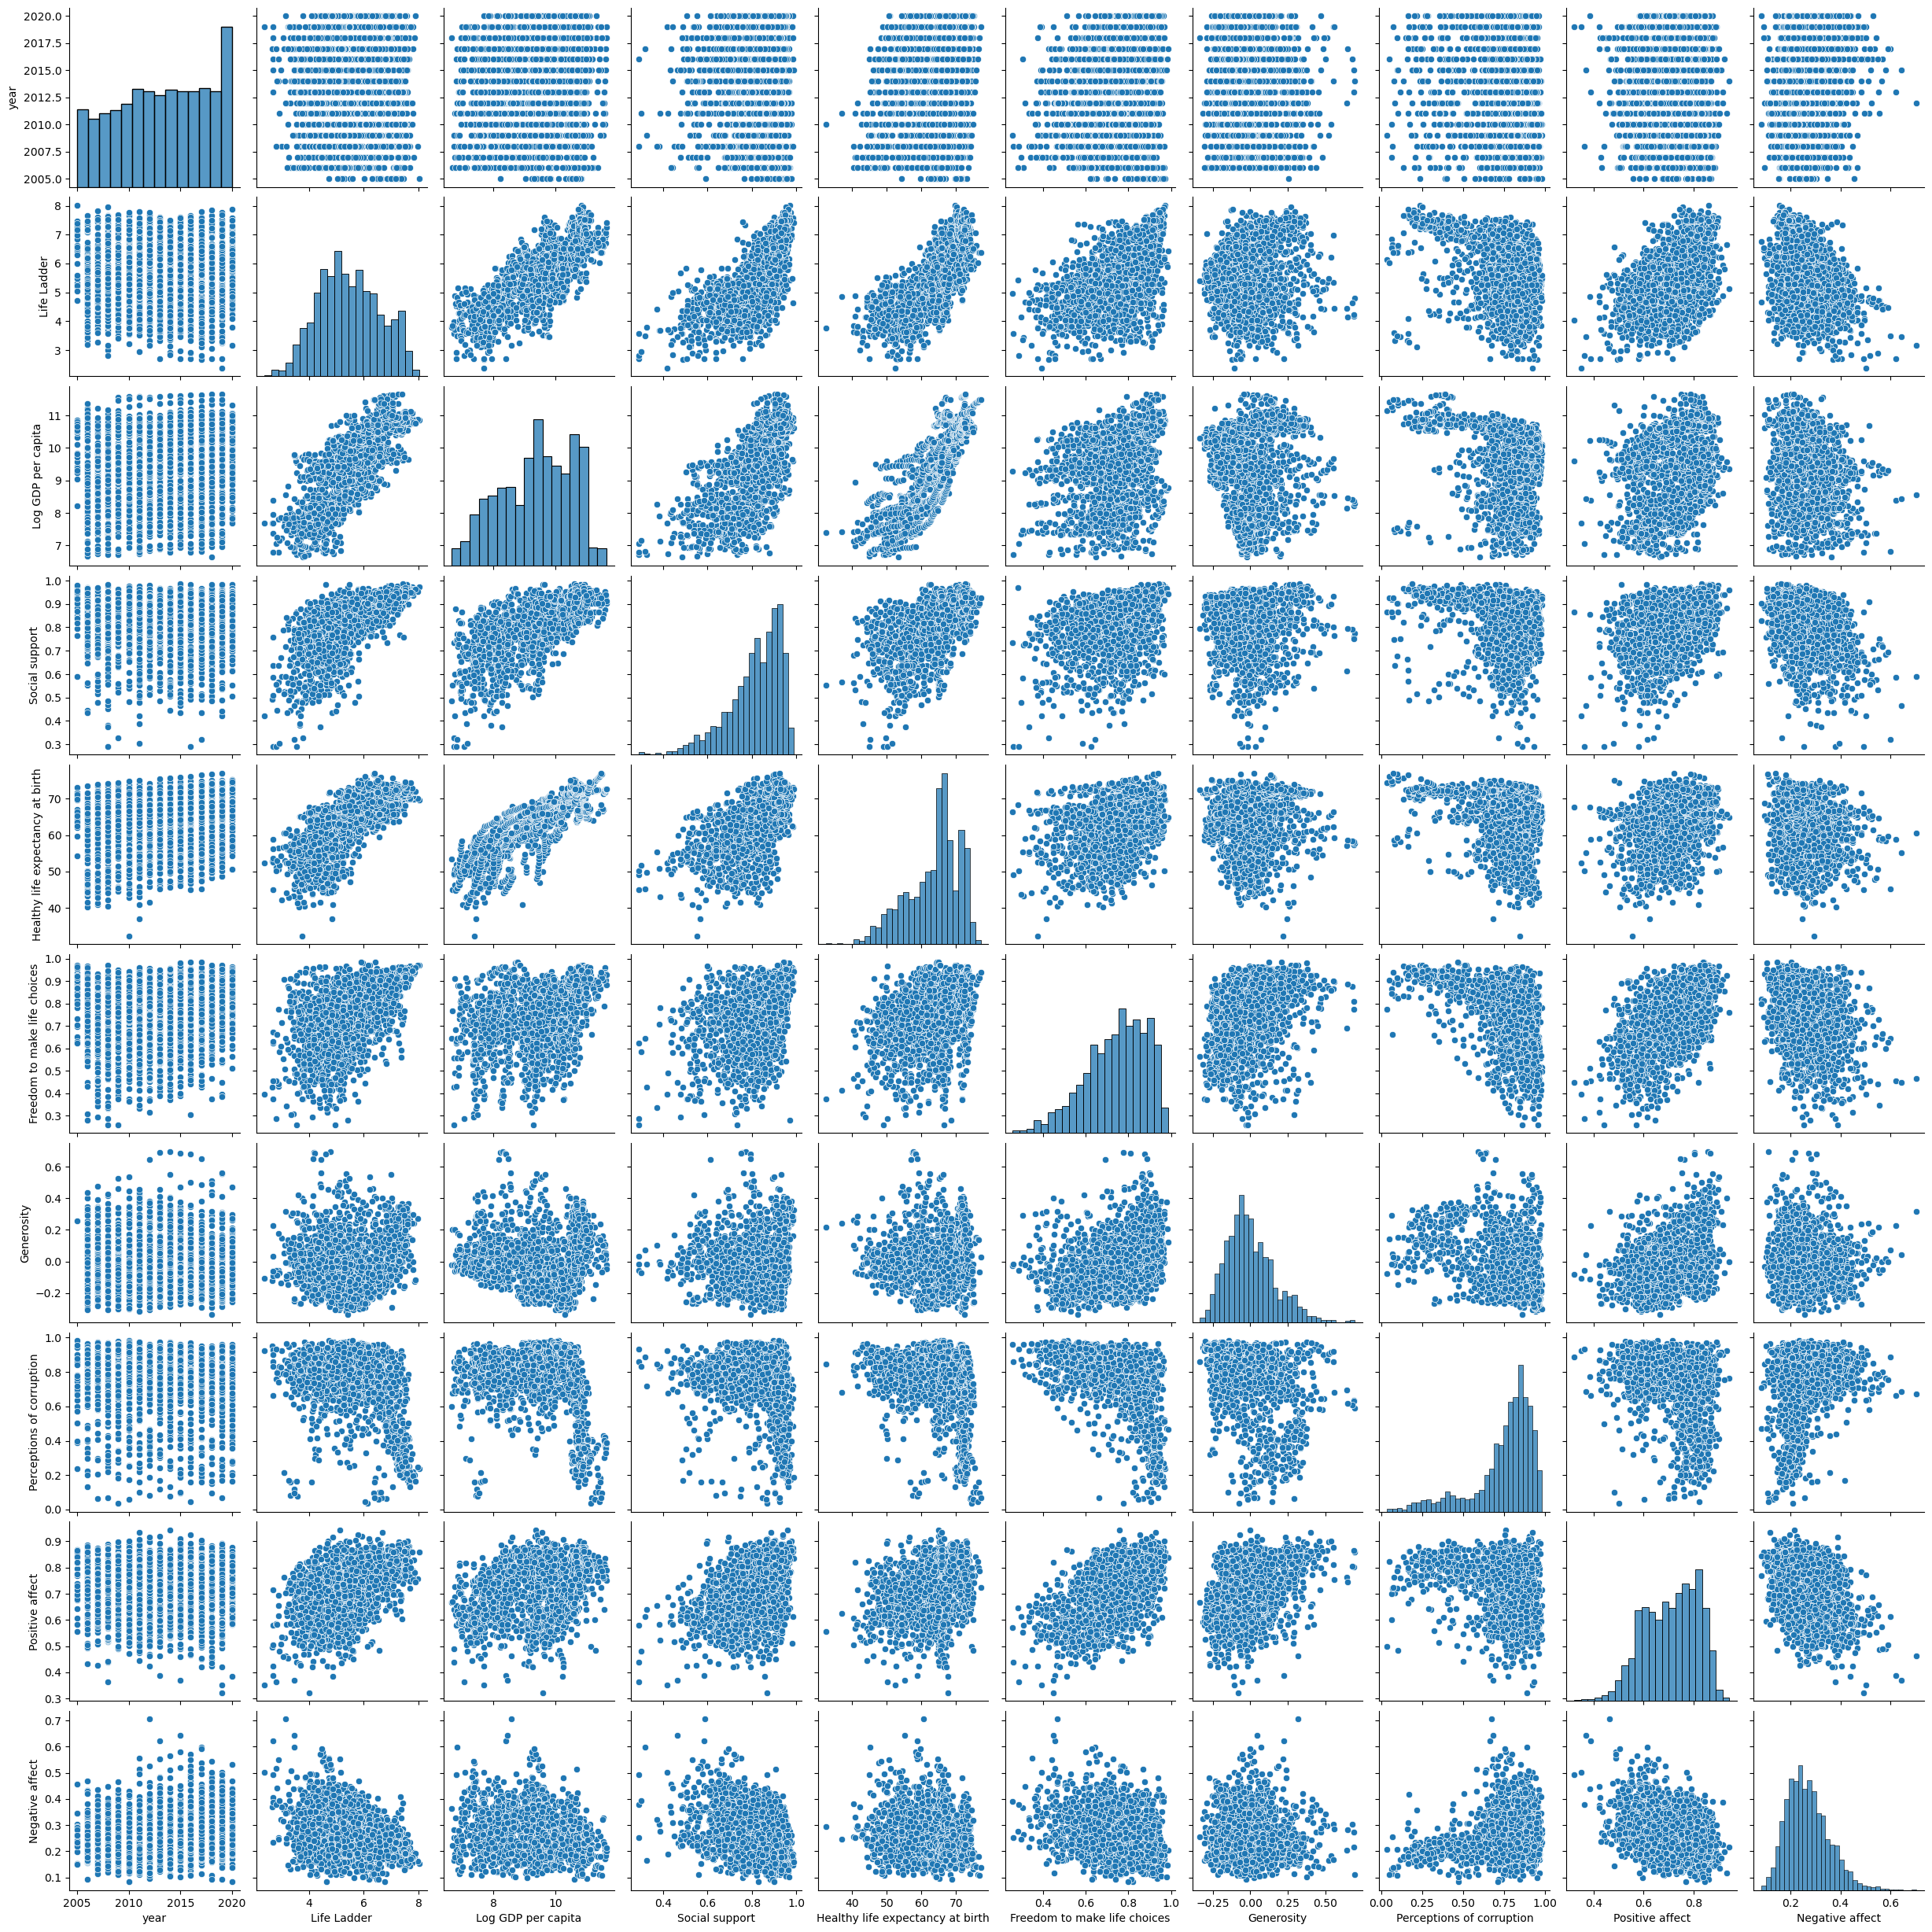

In [10]:
sns.pairplot(happiness_data)

The above pair plot gives relationship between the different attributes present in the data. The each individual plot is a scatter plot. 

### The relationship between data attributes and label :

In the above graph, we explored the relationship between the attributes. Now, going forward we will plot scatter plot for all the attributes against the label. In this case, 'Healthy life expectancy at birth'.

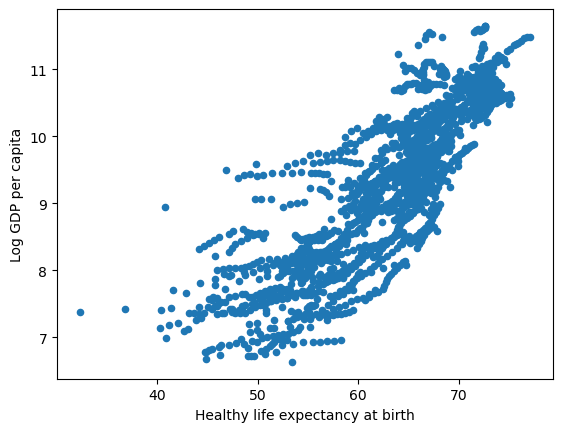

In [11]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Log GDP per capita')
plt.show()

##### Relationship between Healthy life expectancy and Social Support:

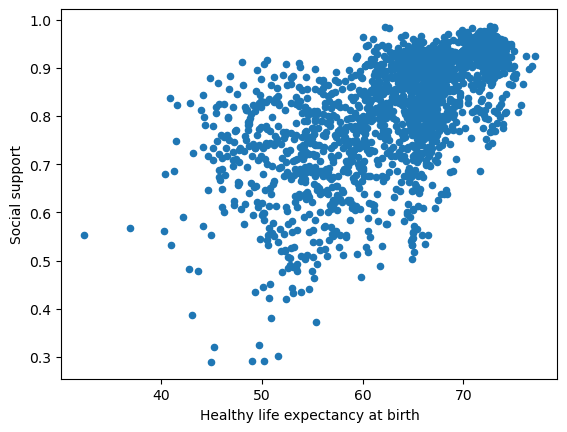

In [12]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Social support')
plt.show()

##### Relationship between Healthy life expectancy and Freedom to make life choices :

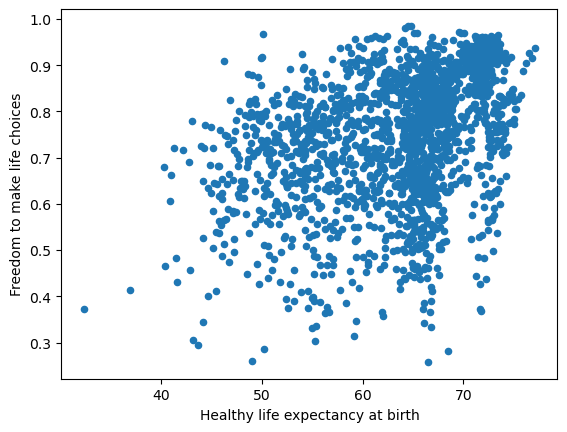

In [13]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Freedom to make life choices')
plt.show()

##### Relationship between Healthy life expectancy and  Generosity:

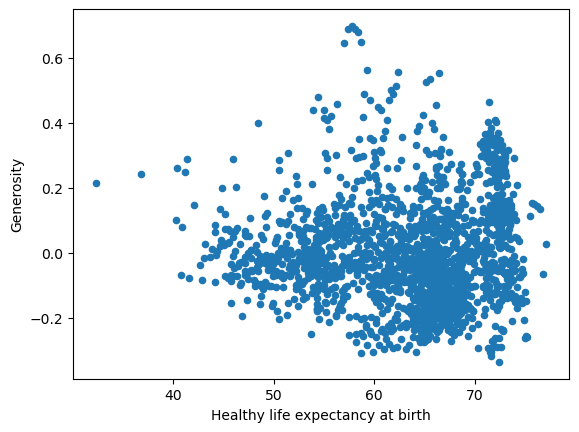

In [14]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Generosity')
plt.show()

##### Relationship between Healthy life expectancy and Perceptions of corruption:

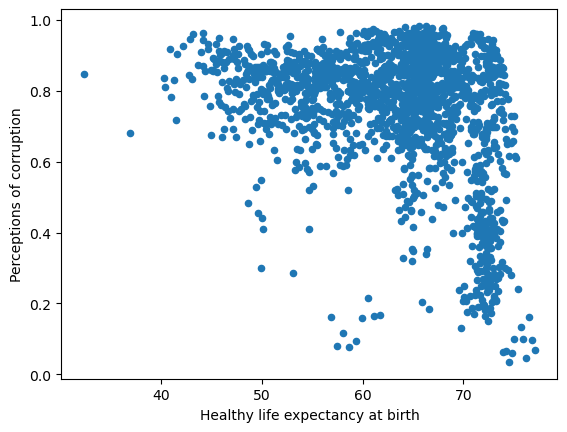

In [15]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Perceptions of corruption')
plt.show()

##### Relationship between Healthy life expectancy and Positive affect :

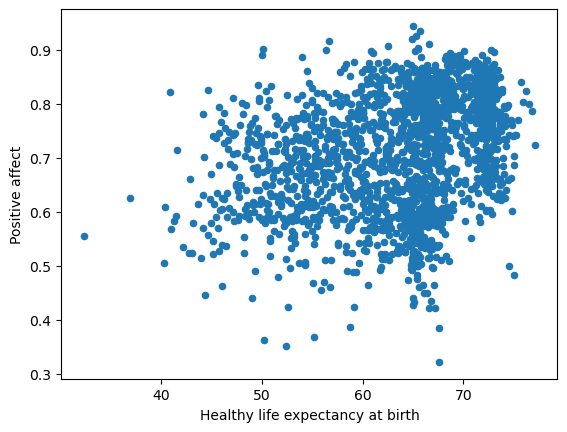

In [16]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Positive affect')
plt.show()

#### Relationship between Healthy life expectancy and Negative affect :

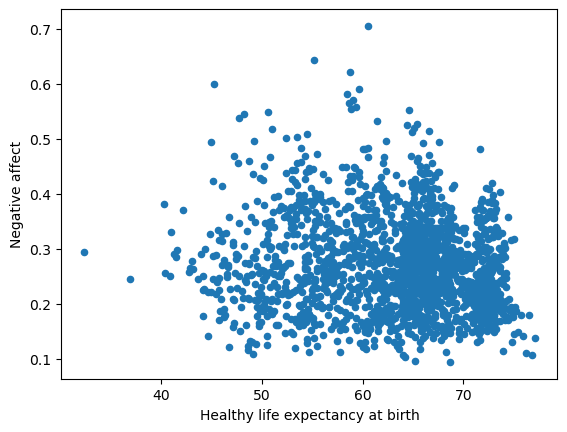

In [17]:
happiness_data.plot.scatter(x='Healthy life expectancy at birth', y= 'Negative affect')
plt.show()

Now, lets see the distribution of the data with the use of histogram.

Looking at the above scatter plots, it appears that the columns 'Log GDP per capita', 'Life Ladder', 'Social support' are strongly correlated with each other. 

Let's get the statistical summary for the dataset.

In [18]:
happiness_data.corr(method ='pearson')

year  Life Ladder  Log GDP per capita  \
year                              1.000000     0.035515            0.078246   
Life Ladder                       0.035515     1.000000            0.790166   
Log GDP per capita                0.078246     0.790166            1.000000   
Social support                   -0.010093     0.707806            0.692602   
Healthy life expectancy at birth  0.164059     0.744506            0.848049   
Freedom to make life choices      0.222151     0.528063            0.367932   
Generosity                       -0.043422     0.190632           -0.000915   
Perceptions of corruption        -0.081478    -0.427245           -0.345511   
Positive affect                  -0.003245     0.532273            0.302282   
Negative affect                   0.196869    -0.297488           -0.210781   

                                  Social support  \
year                                   -0.010093   
Life Ladder                             0.707806   
Log GDP per capita                      0.692602   
Social support                          1.000000   
Healthy life expectancy at birth        0.616037   
Freedom to make life choices            0.410402   
Generosity                              0.067000   
Perceptions of corruption              -0.219040   
Positive affect                         0.432152   
Negative affect                        -0.395865   

                                  Healthy life expectancy at birth  \
year                                                      0.164059   
Life Ladder                                               0.744506   
Log GDP per capita                                        0.848049   
Social support                                            0.616037   
Healthy life expectancy at birth                          1.000000   
Freedom to make life choices                              0.388681   
Generosity                                                0.020737   
Perceptions of corruption                                -0.322461   
Positive affect                                           0.318247   
Negative affect                                          -0.139477   

                                  Freedom to make life choices  Generosity  \
year                                                  0.222151   -0.043422   
Life Ladder                                           0.528063    0.190632   
Log GDP per capita                                    0.367932   -0.000915   
Social support                                        0.410402    0.067000   
Healthy life expectancy at birth                      0.388681    0.020737   
Freedom to make life choices                          1.000000    0.329300   
Generosity                                            0.329300    1.000000   
Perceptions of corruption                            -0.487883   -0.290706   
Positive affect                                       0.606114    0.358006   
Negative affect                                      -0.267661   -0.092542   

                                  Perceptions of corruption  Positive affect  \
year                                              -0.081478        -0.003245   
Life Ladder                                       -0.427245         0.532273   
Log GDP per capita                                -0.345511         0.302282   
Social support                                    -0.219040         0.432152   
Healthy life expectancy at birth                  -0.322461         0.318247   
Freedom to make life choices                      -0.487883         0.606114   
Generosity                                        -0.290706         0.358006   
Perceptions of corruption                          1.000000        -0.296517   
Positive affect                                   -0.296517         1.000000   
Negative affect                                    0.264225        -0.374439   

                                  Negative affect  
year                            

In [19]:
happiness_data.corr(method ='pearson')["Healthy life expectancy at birth"].sort_values(ascending=False)

Healthy life expectancy at birth    1.000000
Log GDP per capita                  0.848049
Life Ladder                         0.744506
Social support                      0.616037
Freedom to make life choices        0.388681
Positive affect                     0.318247
year                                0.164059
Generosity                          0.020737
Negative affect                    -0.139477
Perceptions of corruption          -0.322461
Name: Healthy life expectancy at birth, dtype: float64

### Task 2b: Are  there  any  attributes  that  might  require  special  treatment?  If  so,  what special treatment might they require?

The following normalization and standardization steps will require to complete preprocessing of the data :
1. We will ignore 2 columns : year and Life Ladder
2. Also, we will drop the Generosity column in the data, as the coefficient of correlation is 0.0207, which is very weak and I believe that dropping this feature will not put any affect on the model.
2. We will remove the null values, probably by taking median of each feature
3. We will scale everything into the same scale(except Healthy life expectancy)
4. And, finally we will separate label  Healthy life expectancy from the data.

First, we will drop 2 columns, year and Life ladder as stated in the Assignment, and also generosity as the correlation is weak.

In [20]:
happiness_data.drop(columns= ['year', 'Generosity', 'Life Ladder'], axis = 1, inplace = True)

Also, if there are Null values in 'Healthy life expectancy at birth' column, I will drop the respective rows from the dataset.

In [21]:
happiness_data = happiness_data.dropna(subset = ['Healthy life expectancy at birth'])

Now, we will do data preprocessing. i.e., we will imputate the numerical null values with median and the categorical value with the most frequent value. And also, Standerdise all of the numerical attributes.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
num_attribs = ['Log GDP per capita',
               'Social support',
               'Freedom to make life choices',
               'Perceptions of corruption',
               'Positive affect',
               'Negative affect']

num_pipeline = make_pipeline(StandardScaler(),SimpleImputer(strategy="median"))

In [24]:
cat_attribs = ["Country name"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse =False))

In [25]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [26]:
features_prepared = preprocessing.fit_transform(happiness_data)

In [27]:
features = pd.DataFrame(
    features_prepared, columns=preprocessing.get_feature_names_out(),
    index=happiness_data.index)

In [28]:
labels = pd.DataFrame(happiness_data[['Healthy life expectancy at birth']])

In [29]:
features.describe() , labels.describe()

(       num__Log GDP per capita  num__Social support  \
 count              1894.000000          1894.000000   
 mean                  0.000831             0.001415   
 std                   0.995536             0.996971   
 min                  -2.359267            -4.356133   
 25%                  -0.783103            -0.542391   
 50%                   0.087444             0.206178   
 75%                   0.840678             0.790021   
 max                   1.980918             1.457269   
 
        num__Freedom to make life choices  num__Perceptions of corruption  \
 count                        1894.000000                     1894.000000   
 mean                            0.002404                        0.017123   
 std                             0.992220                        0.973230   
 min                            -3.412243                       -3.849740   
 25%                            -0.662008                       -0.263350   
 50%                            

### Here, The Data Preprocessing has been completed, The 'features' contains all the attributes and 'labels' contains the prediction outcome.

=====================================================================================================================

#### Task 4: Select  20%  of  the  data  for  testing.  Describe  how  you  did  that  and  verify  that  your  test portion of the data is representative of the entire dataset. 

To select 20% data for testing, we will use the train_test_split() method from sklearn.model_selection class, with test_size = 0.2. Here, 0.2 indicates 20% of total dataset. 

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Implemented Stratified Shuffle Split - Start

In [30]:
y = np.random.uniform(low=0.0, high=1.0, size=(len(labels),))

# bin the target variable into 5 categories
binned_labels = np.digitize(y, bins=[0.2, 0.4, 0.6, 0.8])

In [31]:
from sklearn.model_selection import train_test_split
phi_train, phi_test, t_train, t_test = train_test_split(features, labels, test_size=0.2, 
                                                        shuffle=True, 
                                                        random_state=42,
                                                        stratify=binned_labels
                                                       )

In [32]:
y = np.random.uniform(low=0.0, high=1.0, size=(len(t_train),))

# bin the target variable into 5 categories
binned_labels = np.digitize(y, bins=[0.2, 0.4, 0.6, 0.8])

In [33]:
phi_train, phi_val, t_train, t_val = train_test_split(phi_train, t_train, test_size=0.2, 
                                                        shuffle=True, 
                                                        random_state=42,
                                                        stratify=binned_labels
                                                       )

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Implemented Stratified Shuffle Split - End

In [34]:
# from sklearn.model_selection import train_test_split
# phi_train, phi_test, t_train, t_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In order to validate whether my train and test dataset have similar distribution, we will check the summary statistics of the both dataframes.

In [35]:
phi_train.describe()

num__Log GDP per capita  num__Social support  \
count              1212.000000          1212.000000   
mean                 -0.018789            -0.023815   
std                   1.011847             0.991108   
min                  -2.322038            -4.356133   
25%                  -0.863838            -0.573668   
50%                   0.087444             0.164475   
75%                   0.844141             0.767084   
max                   1.980918             1.457269   

       num__Freedom to make life choices  num__Perceptions of corruption  \
count                        1212.000000                     1212.000000   
mean                           -0.000937                        0.019470   
std                             0.987680                        0.953900   
min                            -3.412243                       -3.849740   
25%                            -0.683110                       -0.252564   
50%                             0.146884                        0.294832   
75%                             0.793998                        0.631899   
max                             1.602890                        1.262888   

       num__Positive affect  num__Negative affect  \
count           1212.000000           1212.000000   
mean               0.009985              0.002778   
std                0.967836              0.987216   
min               -3.010988             -2.079085   
25%               -0.757182             -0.735012   
50%                0.118263             -0.116500   
75%                0.798130              0.585273   
max                2.176491              4.189294   

       cat__Country name_Afghanistan  cat__Country name_Albania  \
count                    1212.000000                1212.000000   
mean                        0.004950                   0.006601   
std                         0.070214                   0.081009   
min                         0.000000                   0.000000   
25%                         0.000000                   0.000000   
50%                         0.000000                   0.000000   
75%                         0.000000                   0.000000   
max                         1.000000                   1.000000   

       cat__Country name_Algeria  cat__Country name_Angola  ...  \
count                1212.000000               1212.000000  ...   
mean                    0.004950                  0.002475  ...   
std                     0.070214                  0.049711  ...   
min                     0.000000                  0.000000  ...   
25%                     0.000000                  0.000000  ...   
50%                     0.000000                  0.000000  ...   
75%                     0.000000                  0.000000  ...   
max                     1.000000                  1.000000  ...   

       cat__Country name_United Arab Emirates  \
count                             1212.000000   
mean                                 0.008251   
std                                  0.090496   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       cat__Country name_United Kingdom  cat__Country name_United States  \
count                       1212.000000                      1212.000000   
mean                           0.007426                         0.007426   
std                            0.085888                         0.085888   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            0.000000                         0.000000   
max                            1.000000                         1.000000   

       cat__C

In [36]:
phi_test.describe()

num__Log GDP per capita  num__Social support  \
count               379.000000           379.000000   
mean                  0.072712             0.032214   
std                   0.992090             1.027348   
min                  -2.359267            -4.247705   
25%                  -0.700421            -0.494433   
50%                   0.136794             0.256222   
75%                   0.929421             0.840064   
max                   1.937629             1.315479   

       num__Freedom to make life choices  num__Perceptions of corruption  \
count                         379.000000                      379.000000   
mean                           -0.086365                       -0.016201   
std                             1.035584                        1.057421   
min                            -3.250464                       -3.714913   
25%                            -0.742898                       -0.311888   
50%                             0.048410                        0.294832   
75%                             0.677939                        0.666954   
max                             1.504416                        1.262888   

       num__Positive affect  num__Negative affect  \
count            379.000000            379.000000   
mean              -0.054733              0.020679   
std                1.034719              1.026072   
min               -3.346265             -2.090980   
25%               -0.850315             -0.669592   
50%                0.118263             -0.116500   
75%                0.812100              0.597168   
max                1.822587              5.176534   

       cat__Country name_Afghanistan  cat__Country name_Albania  \
count                     379.000000                 379.000000   
mean                        0.010554                   0.005277   
std                         0.102325                   0.072547   
min                         0.000000                   0.000000   
25%                         0.000000                   0.000000   
50%                         0.000000                   0.000000   
75%                         0.000000                   0.000000   
max                         1.000000                   1.000000   

       cat__Country name_Algeria  cat__Country name_Angola  ...  \
count                 379.000000                379.000000  ...   
mean                    0.002639                  0.002639  ...   
std                     0.051367                  0.051367  ...   
min                     0.000000                  0.000000  ...   
25%                     0.000000                  0.000000  ...   
50%                     0.000000                  0.000000  ...   
75%                     0.000000                  0.000000  ...   
max                     1.000000                  1.000000  ...   

       cat__Country name_United Arab Emirates  \
count                              379.000000   
mean                                 0.002639   
std                                  0.051367   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       cat__Country name_United Kingdom  cat__Country name_United States  \
count                        379.000000                       379.000000   
mean                           0.013193                         0.010554   
std                            0.114250                         0.102325   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            0.000000                         0.000000   
max                            1.000000                         1.000000   

       cat__C

If we look at the data given by phi_train and phi_test, the mean, standard deviation and the quartile ranges are almost similar. This means the both train and test datasets are derived from the same distribution. Thus, are representative of the entire dataset.

### ===================================================================================

# Task 5:

#### Train  a  Linear  Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a  few  values  of  penalty  term  and  describe  its  impact.  Explore  the  impact  of  other hyperparameters,  like  batch  size  and  learning  rate  (no  need  for  grid  search).  Describe your findings. Display the training and validation loss as a function of training iterations. 

# Linear Regression 

In [37]:
from sklearn.model_selection import KFold, learning_curve, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
reg = LinearRegression().fit(phi_train, t_train)

reg_cv = cross_validate(reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [39]:
# let's look at the output from k fold
print("Linear Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_mean_absolute_error'])))

Linear Regression: 

 For metric R^2 :
	 Training loss: 0.976
	 Validation loss: -251,452,692,353,165,656,064.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 1.185
	 Validation loss: 63,458,713,901.327

 For metric Mean Absolute Error(MAE) :
	 Training loss: 0.755
	 Validation loss: 5,155,668,070.654


As we can see, there is huge gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Linear regression model is clearly overfitting for the training data.

#### Training and validation loss as a function of training set size

In [40]:
train_sizes, train_scores, valid_scores = learning_curve(reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0,10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

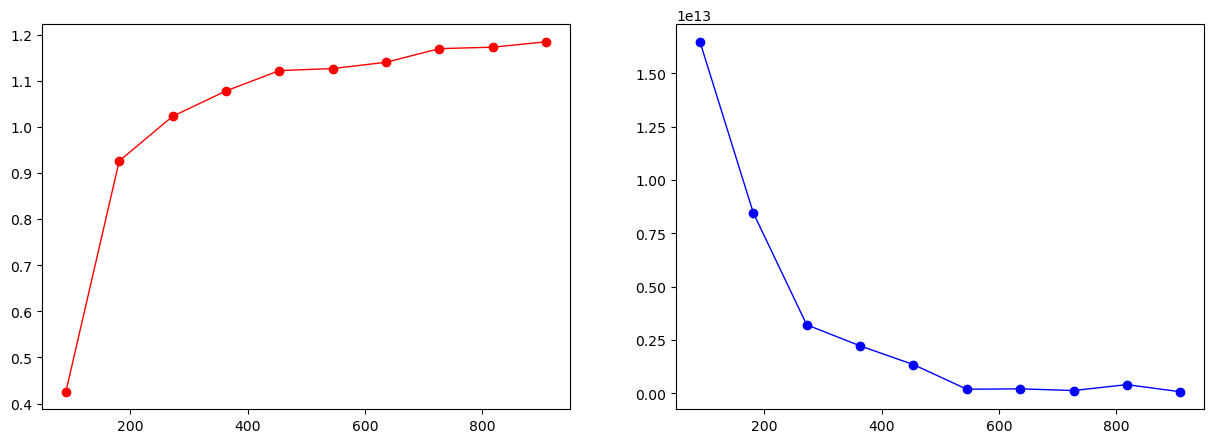

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
plt.show()

#### Observations : 
1. The above two figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.
2. The RMSE for training data gradually increases in accordance with the training set sizes, whereas the validation loss fluctuates, and it is way too much higher. This states that the model is overfitting.

##### ===============================================================================================================

# Stochastic Gradient Descent(SGD)

#### Task 5b: Train  a  Stochastic Gradient Descent(SGD) Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [42]:
from sklearn.linear_model import SGDRegressor

In [43]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(phi_train, t_train)

sgd_reg_cv = cross_validate(sgd_reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [44]:
# let's look at the output from k fold
print("Stochastic Gradient Descent Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(sgd_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(sgd_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_mean_absolute_error'])))

Stochastic Gradient Descent Regression: 

 For metric R^2 :
	 Training loss: 0.966
	 Validation loss: 0.948

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 1.404
	 Validation loss: 1.723

 For metric Mean Absolute Error(MAE) :
	 Training loss: 0.894
	 Validation loss: 1.109


As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Linear regression model is performing well for the training as well as validation data, although it is slightly overfits on the training data.

#### Training and validation loss as a function of training set size

In [45]:
train_sizes, train_scores, valid_scores = learning_curve( sgd_reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

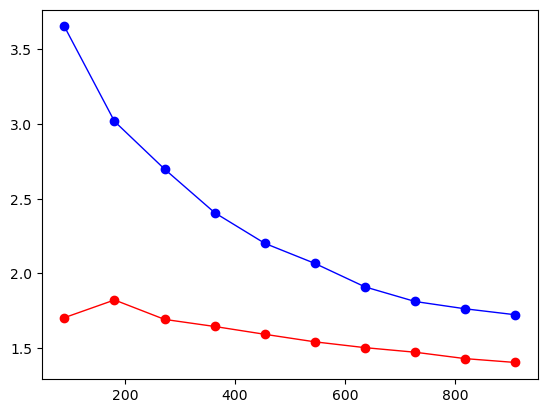

In [46]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Training and validation loss as a function of training iterations. 

# 1. With no Penalty 

In [47]:
def calculate_for_sgd(phi_train, t_train, phi_val, t_val, penalty_val, learning_rate):
    sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                           penalty=penalty_val, learning_rate="constant",
                           eta0=learning_rate, random_state=42)
    n_epochs = 5000
    train_loss, val_loss = [], []
    minimum_val_loss = float("inf")
    minimum_epochs = float("inf")
    for epoch in range(1, n_epochs):
        sgd_reg.fit(phi_train, t_train)

        t_train_predict = sgd_reg.predict(phi_train)
        t_val_predict = sgd_reg.predict(phi_val)

        train_loss.append(mean_squared_error(t_train, t_train_predict))
        validation_loss = mean_squared_error(t_val, t_val_predict)
        val_loss.append(validation_loss)

        if minimum_val_loss > validation_loss:
            minimum_val_loss=validation_loss
            minimum_epochs=epoch

    best_val_rmse = np.sqrt(minimum_val_loss)
    print(f'minumum RMSE value {best_val_rmse} at epoch = {minimum_epochs}')
    
    return n_epochs, best_val_rmse, np.sqrt(train_loss), np.sqrt(val_loss)

In [48]:
def plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse):
    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(train_rmse, "r--", label="RMSE on Training data")
    plt.plot(val_rmse, "b-", label="RMSE on Validation data")
    plt.legend(loc="upper right")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Value")
    plt.show()

In [49]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 0.0005)

minumum RMSE value 1.456151711630104 at epoch = 2223


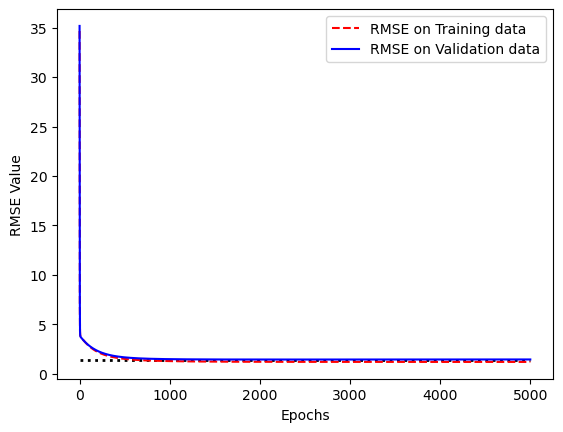

In [50]:
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.

This learning curve looks different one. The training loss is incresing gradually with the increase in training set size. With the increase in the training set size, the validation loss reach closer to the training loss as well. So, I believe that the model performs significantly better on the training data than on the validation data, which indicates that the model overfitts on training data.


##### ===============================================================================================================

# 1.1 Exploring impact of learning rate

### learning rate = 0.001

minumum RMSE value 1.4584954662027179 at epoch = 1110


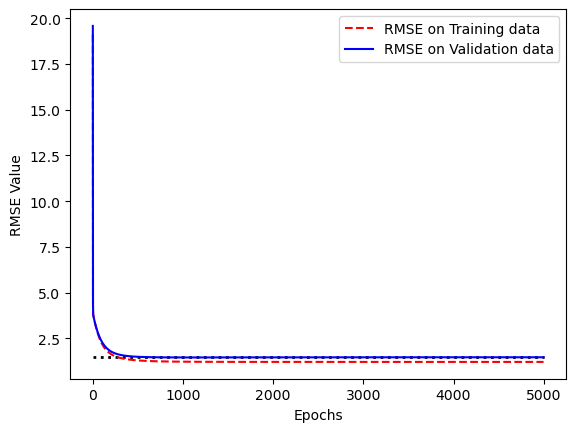

In [57]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 0.001)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 0.1

minumum RMSE value 1.8022204114968878 at epoch = 4


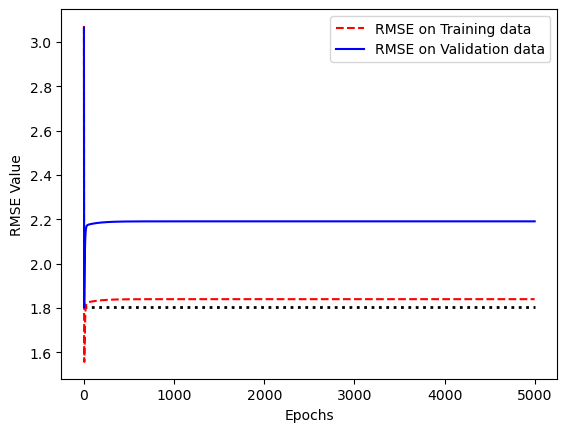

In [58]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 0.1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 1

minumum RMSE value 1737985086348.3232 at epoch = 4469


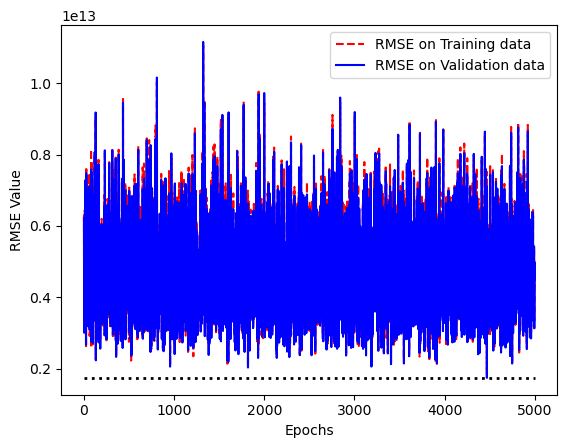

In [59]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 10

minumum RMSE value 19499831147659.965 at epoch = 1294


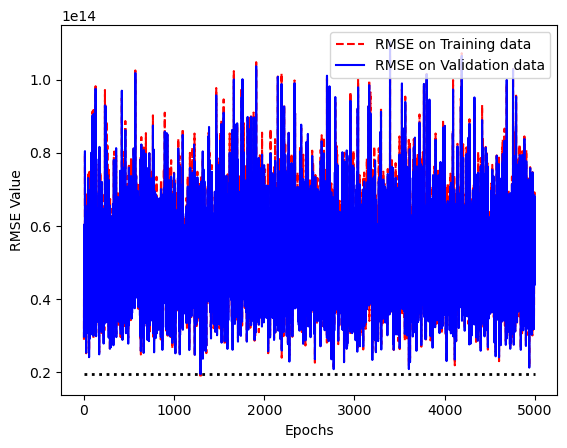

In [60]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 10)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

# 2. With L1 Penalty

minumum RMSE value 1.4574321389836564 at epoch = 2306


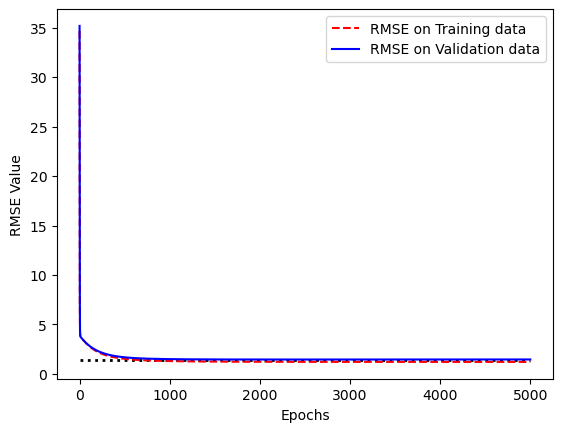

In [61]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, "l1", 0.0005)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

## 2.1 Exploring impact of learning rate

### learning rate = 0.1

minumum RMSE value 1.8022204114968878 at epoch = 4


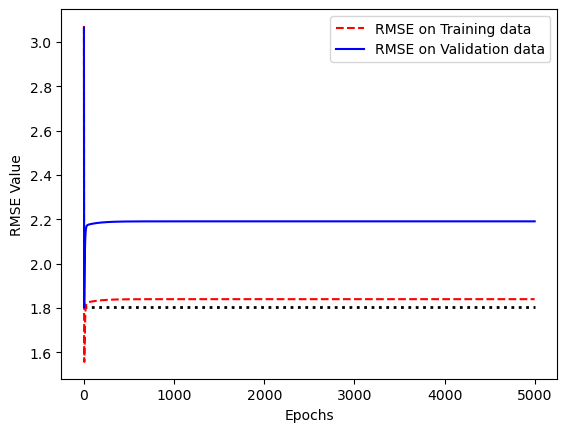

In [62]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 0.1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 1

minumum RMSE value 1737985086348.3232 at epoch = 4469


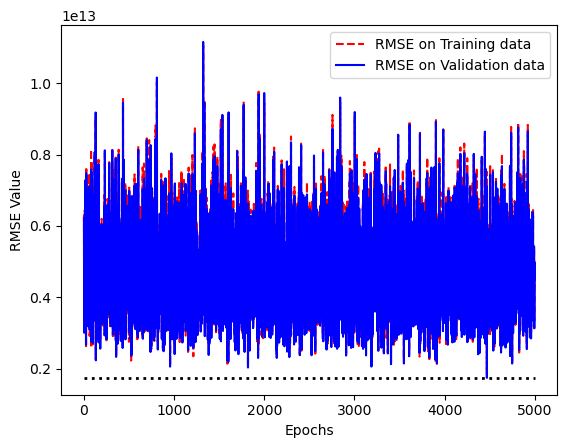

In [63]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 10

minumum RMSE value 19499831147659.965 at epoch = 1294


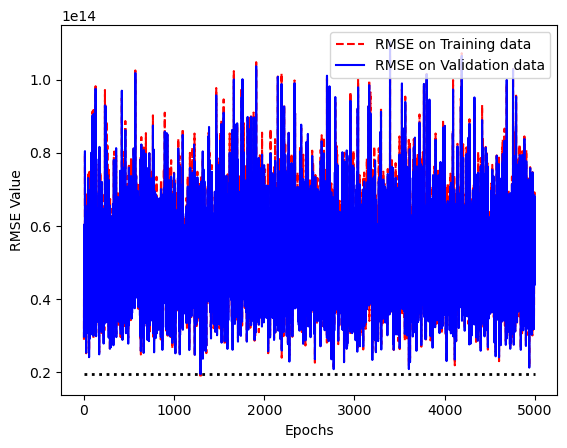

In [64]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 10)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

# 3. With L2 Penalty

minumum RMSE value 1.4618036156355738 at epoch = 2546


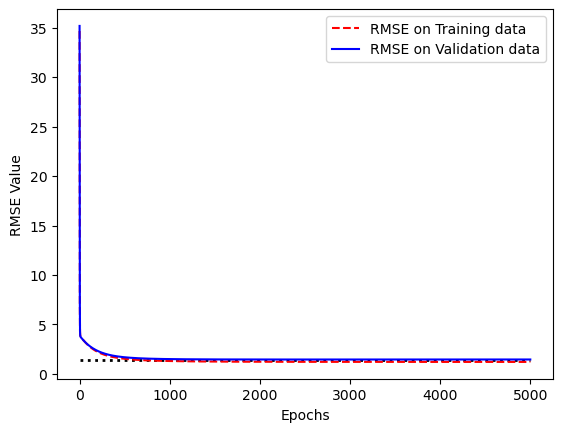

In [65]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, "l2", 0.0005)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

## 3.1 Exploring impact of learning rate

### learning rate = 0.1

minumum RMSE value 1.8022204114968878 at epoch = 4


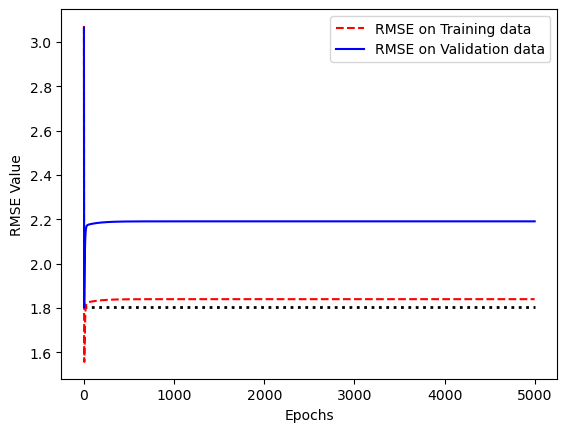

In [66]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 0.1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 1

minumum RMSE value 1737985086348.3232 at epoch = 4469


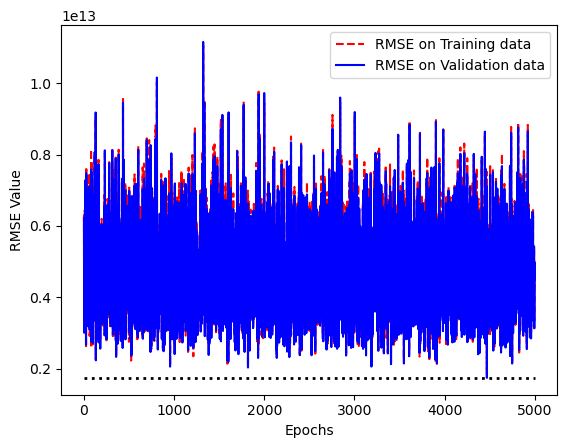

In [67]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 10

minumum RMSE value 19499831147659.965 at epoch = 1294


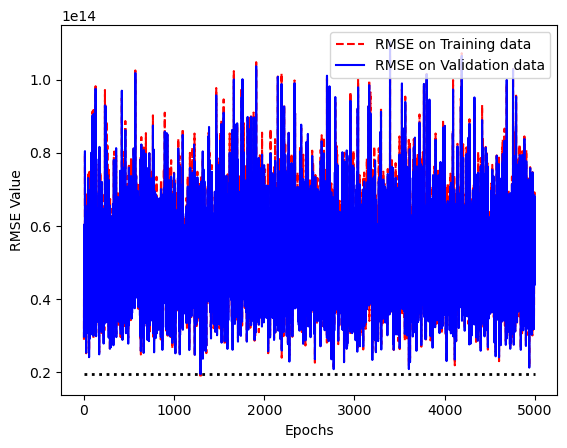

In [68]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 10)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

# 4. ElasticNet

minumum RMSE value 1.4610538659670034 at epoch = 2507


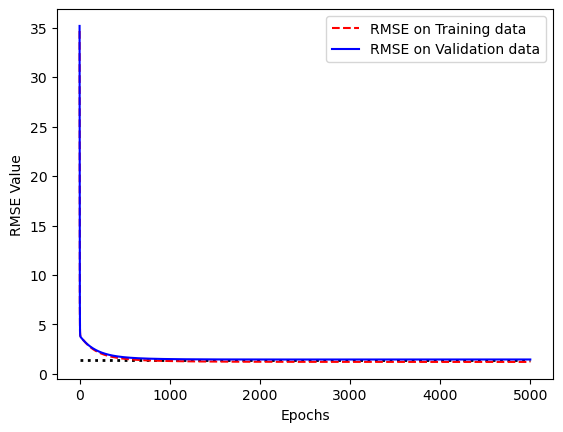

In [69]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, "elasticnet", 0.0005)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

## 4.1 Exploring impact of learning rate

### learning rate = 0.1

minumum RMSE value 1.8022204114968878 at epoch = 4


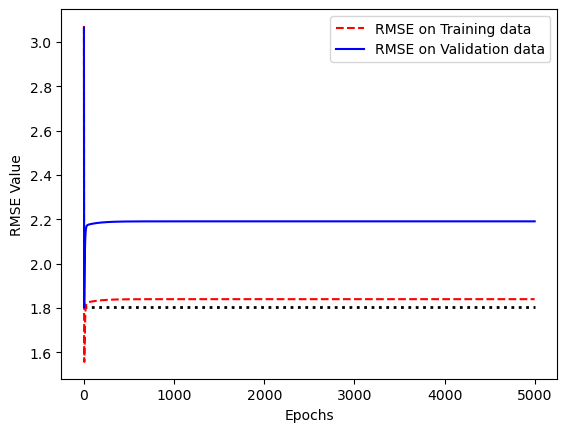

In [70]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 0.1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 1

minumum RMSE value 1737985086348.3232 at epoch = 4469


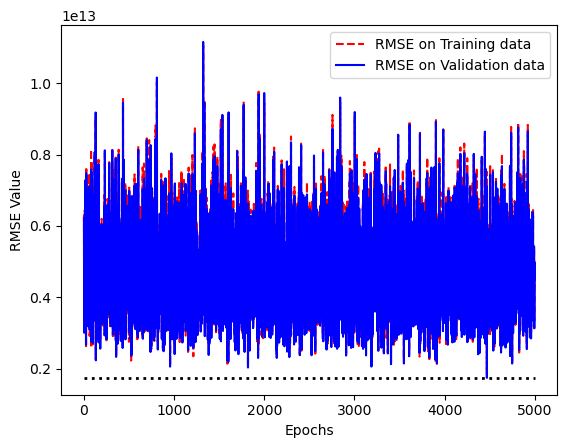

In [71]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 1)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

### learning rate = 10

minumum RMSE value 19499831147659.965 at epoch = 1294


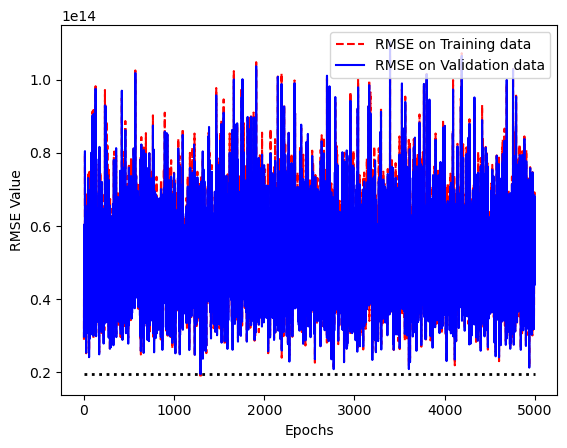

In [72]:
n_epochs, best_val_rmse, train_rmse, val_rmse = calculate_for_sgd(phi_train, t_train, phi_val, t_val, None, 10)
plot_loss_vs_epochs(n_epochs,best_val_rmse, train_rmse, val_rmse)

# Linear Regression with Ridge Regularization

In [73]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

ridge_reg.fit(phi_train, t_train)

ridge_reg_cv = cross_validate(ridge_reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Ridge Regularization: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(ridge_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(ridge_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Linear Regression with Ridge Regularization model is performing well for the training as well as validation data. However, the validation loss is greater than the Training loss, which indicates the model is overfitting on the training data.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(ridge_reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.
This learning curve looks somewhat similar to SGD regression. As the validation loss is greater than the training loss, the model is overfitting. 

##### ===============================================================================================================

### Hyperparameter Tuning for Linear Regression with Ridge Regularization

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv = RidgeCV(alphas=np.arange(0.01,2,0.01)).fit(phi_train, t_train)
ridge_cv.score(phi_train, t_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
ridge_reg_training_loss = []
ridge_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    ridge_reg = Ridge(alpha=aplha_value, solver="cholesky")
    ridge_reg_cv = cross_validate(ridge_reg, 
                                  phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    ridge_reg_training_loss.append(-np.mean(ridge_reg_cv['train_score']))
    ridge_reg_validation_loss.append(-np.mean(ridge_reg_cv['test_score']))

In [ ]:
plt.plot(np.arange(0.01,2,0.01), ridge_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), ridge_reg_validation_loss, "b-", linewidth=1, label="valid")

The above plot shows training and validation loss for Linear Regression with Ridge Regularization method, on X-axis denotes alpha values and Y axis denotes the loss.

Looking at the plot, we can infer that, there is slightly little dip at the begining and then the validation & training loss gradually increases. Which indicates that, our model performs better at alpha = 0.13, value for alpha given by cross validation.

##### ===============================================================================================================

# Linear Regression with Lasso Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(phi_train, t_train)

lasso_reg_cv = cross_validate(lasso_reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Lasso Regularization: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(lasso_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(lasso_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. 

This suggests that the Linear Regression with Lasso Regularization performs relatively worse than SGD and Linear Regression with Ridge Regularization. And also, the validation loss is greater than the trainng loss. Thus, the model is overfitting. 

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(lasso_reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.

This learning curve looks kind of similar to learning curves given by SGD and Ridge regularization models. Also, for this model, the validation loss is higher then the training loss. Thus the model overfitts the data.

##### ===============================================================================================================

### Hyperparameter Tuning for Linear Regression with Lasso Regularization

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv = LassoCV(alphas=np.arange(0.01,2,0.01)).fit(phi_train, t_train)
lasso_cv.score(phi_train, t_train)

In [ ]:
# The amount of penalization chosen by cross validation.
lasso_cv.alpha_

In [ ]:
lasso_reg_training_loss = []
lasso_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    lasso_reg = Lasso(alpha=aplha_value)
    lasso_reg_cv = cross_validate(lasso_reg, 
                                  phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    lasso_reg_training_loss.append(-np.mean(lasso_reg_cv['train_score']))
    lasso_reg_validation_loss.append(-np.mean(lasso_reg_cv['test_score']))

In [ ]:
plt.plot(np.arange(0.01,2,0.01), lasso_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), lasso_reg_validation_loss, "b-", linewidth=1, label="valid")
plt.show()

The above plot shows training and validation loss for Linear Regression with Lasso Regularization method, on X-axis denotes alpha values and Y axis denotes the loss.

Looking at the plot, we can infer that, the trainig and validation loss for the values of alpha is increasing in sync with each other. In this model, we will choose  alpha = 0.01 as the validation loss is minimum at this value.

##### ===============================================================================================================

# Linear Regression with Elastic Net Regularization

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:

print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_score'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_score'])))


In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(phi_train, t_train)

elastic_net_cv = cross_validate(elastic_net, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Elastic Net Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(elastic_net_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(elastic_net_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(elastic_net_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(elastic_net_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(elastic_net_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(elastic_net_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. 
The model for the loss ratio 0.5 and alpha = 0.1 performs better than the Lasso Regression but worse then ridge regression. And also here the training loss is higher than validation loss. Thus, the model is overfitting on training data.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(elastic_net, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.
This learning curve showing similar trends as of the linear regression with Lasso regularization.  Similar to the Lasso regularization, for this model, the validation loss is higher then the training loss. Thus, the model overfitts the data.

##### ===============================================================================================================

#### ElasticNet with different penalty terms : 

The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 

For l1_ratio = 0 the penalty is an L2 penalty. 

For l1_ratio = 1 it is an L1 penalty. 

For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

### Hyperparameter Tuning for Linear Regression with Elastic Net Regularization

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_net_cv = ElasticNetCV(alphas=np.arange(0.01,2,0.01), l1_ratio=np.arange(0.0,1.1,0.1)).fit(phi_train, t_train)
elastic_net_cv.score(phi_train, t_train)

In [ ]:
elastic_net_cv.alpha_ , elastic_net_cv.l1_ratio_

Training and validation loss as a function of training iterations. 

In [ ]:
elastic_net_training_loss = []
elastic_net_validation_loss = []
for l1_ratio_value in np.arange(0.0,1.1,0.1):
    elastic_net = ElasticNet(alpha=0.01, l1_ratio=l1_ratio_value)
    elastic_net_cv = cross_validate(elastic_net, 
                                  phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)

    elastic_net_training_loss.append(-np.mean(elastic_net_cv['train_score']))
    elastic_net_validation_loss.append(-np.mean(elastic_net_cv['test_score']))

In [ ]:
plt.plot(np.arange(0.0,1.1,0.1), elastic_net_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.0,1.1,0.1), elastic_net_validation_loss, "b-", linewidth=1, label="valid")

The above plot shows training and validation loss for Linear Regression with Lasso Regularization method, on X-axis denotes the L1 ratio values and Y axis denotes the loss.

Looking at the plot, we can infer that, the trainig and validation loss for the values of alpha is decreasing in sync with each other. In this model, we will choose l1 = 1.0 as the validation loss is minimum at this value. This means that the model functions better at l1 penalty, inturn making Lasso regularization superior over ridge for alpha =0.01

##### ===============================================================================================================

# Task 6 :

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_phi_train = poly_features.fit_transform(phi_train)
poly_phi_val = poly_features.fit_transform(phi_val)
poly_phi_test = poly_features.fit_transform(phi_test)

In [ ]:
reg = LinearRegression().fit(poly_phi_train, t_train)

reg_cv = cross_validate(reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Linear Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is huge gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Polynomial regression model with degree 2 is overfitting for the training data.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0,10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

The above two figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.

The training and validation loss was almost equal to zero till data size of 700. After that a large spike in the validation loss and training loss is observed. Even though this is true, the RMSE values for Training and validation loss are far apart, indicating that the model is overfitting the data.

##### ======================================================================================================================

# Polynomial Regression Stochastic Gradient Descent 

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       alpha = 0.01,
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(poly_phi_train, t_train)

sgd_reg_cv = cross_validate(sgd_reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Stochastic Gradient Descent Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(sgd_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(sgd_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Linear regression model is performing well for the training as well as validation data.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(sgd_reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
plt.show()

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
plt.show()

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.

In this learning curve, the training loss incresing gradually with the increase in Training set size. Whereas the validation loss is decreasing with the increase in the training set size. The validation loss reach closer to the training loss for the full training data. I believe that the model performs significantly better on the training data than on the validation data, which indicates that the model overfitts on training data.



##### ===============================================================================================================

# Polynomial Regression with Ridge Regularization

In [ ]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

ridge_reg.fit(poly_phi_train, t_train)

ridge_reg_cv = cross_validate(ridge_reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Ridge Regularization: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(ridge_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(ridge_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. 

This suggests that the Polynomial Regression with Ridge Regularization model is performing well for the training as well as validation data. However, the validation loss is greater than the Training loss, which indicates the model is overfitting on the training data.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(ridge_reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes. 

This learning curve looks somewhat similar to SGD regression, but there is less gap in the trainig and validation loss. As the validation loss is greater than the training loss, the model is overfitting.

##### ===============================================================================================================

### Hyperparameter Tuning for Polynomial Regression with Ridge Regularization

In [ ]:
ridge_cv = RidgeCV(alphas=np.arange(0.01,2,0.01)).fit(poly_phi_train, t_train)
ridge_cv.score(poly_phi_train, t_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
poly_ridge_reg_training_loss = []
poly_ridge_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    poly_ridge_reg = Ridge(alpha=aplha_value, solver="cholesky")
    poly_ridge_reg_cv = cross_validate(poly_ridge_reg, 
                                  poly_phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    poly_ridge_reg_training_loss.append(-np.mean(poly_ridge_reg_cv['train_score']))
    poly_ridge_reg_validation_loss.append(-np.mean(poly_ridge_reg_cv['test_score']))

In [ ]:
plt.plot(np.arange(0.01,2,0.01), poly_ridge_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), poly_ridge_reg_validation_loss, "b-", linewidth=1, label="valid")

The above plot shows training and validation loss for Linear Regression with Lasso Regularization method, on X-axis denotes alpha values and Y axis denotes the loss.

Looking at the plot, we can infer that, the trainig and validation loss for the values of alpha is increasing in sync with each other. In this model, we will choose alpha = 0.47 as the validation loss is minimum at this value.

##### ===============================================================================================================

# Polynomial Regression with Lasso Regularization

In [ ]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(poly_phi_train, t_train)

lasso_reg_cv = cross_validate(lasso_reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Lasso Regularization: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(lasso_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(lasso_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. 

This suggests that the Polynomial Regression with Lasso Regularization performs relatively worse than SGD and Linear Regression with Ridge Regularization. And also, the validation loss is greater than the trainng loss. Thus, the model is overfitting.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(lasso_reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes.

This learning curve looks kind of similar to learning curves given by SGD and Ridge regularization models. Also, for this model, the validation loss is higher then the training loss. Thus the model overfitts the data.

##### ===============================================================================================================

### Hyperparameter Tuning for Linear Regression with Lasso Regularization

In [ ]:
lasso_cv = LassoCV(alphas=np.arange(0.01,2,0.01)).fit(poly_phi_train, t_train)
lasso_cv.score(poly_phi_train, t_train)

In [ ]:
# The amount of penalization chosen by cross validation.
lasso_cv.alpha_

In [ ]:
poly_lasso_reg_training_loss = []
poly_lasso_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    poly_lasso_reg = Lasso(alpha=aplha_value)
    poly_lasso_reg_cv = cross_validate(poly_lasso_reg, 
                                  poly_phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    poly_lasso_reg_training_loss.append(-np.mean(poly_lasso_reg_cv['train_score']))
    poly_lasso_reg_validation_loss.append(-np.mean(poly_lasso_reg_cv['test_score']))

In [ ]:
plt.plot(np.arange(0.01,2,0.01), poly_lasso_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), poly_lasso_reg_validation_loss, "b-", linewidth=1, label="valid")

The above plot shows training and validation loss for Polynomial Regression with Lasso Regularization method, on X-axis denotes alpha values and Y axis denotes the loss.

Looking at the plot, we can infer that, the trainig and validation loss for the values of alpha is increasing in sync with each other. In this model, we will choose alpha = 0.01 as the validation loss is minimum at this value.

##### ===============================================================================================================

#  Polynomial Regression with Elastic Net Regularization

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(poly_phi_train, t_train)

elastic_net_cv = cross_validate(elastic_net, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [ ]:
# let's look at the output from k fold
print("Elastic Net Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(elastic_net_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(elastic_net_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(elastic_net_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(elastic_net_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_mean_absolute_error'])))

As we can see, there is very little gap between training loss and testing loss, when a cross validation method used with 3 parameters ${R^2}$, Root-Mean Squared Error, and Mean Absolute error. 

The model for the loss ratio 0.5 and alpha = 0.1 performs better than the Lasso Regression but worse then ridge regression. And also here the training loss is higher than validation loss. Thus, the model is overfitting on training data.

#### Training and validation loss as a function of training set size

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(elastic_net, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
plt.show()

In [ ]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
plt.show()

The above figures depicts a line plot of Training loss and Validation Loss(RMSE) against different training set sizes. This learning curve showing similar trends as of the linear regression with Lasso regularization. Similar to the Lasso regularization, for this model, the validation loss is higher then the training loss. Thus, the model overfitts the data.

##### ===============================================================================================================

#### ElasticNet with different penalty terms : 

The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 

For l1_ratio = 0 the penalty is an L2 penalty. 

For l1_ratio = 1 it is an L1 penalty. 

For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

### Hyperparameter Tuning for  Polynomial  Regression with Elastic Net Regularization

In [ ]:
elastic_net_cv = ElasticNetCV(alphas= [0.01], l1_ratio=np.arange(0.0,1.1,0.1)).fit(poly_phi_train, t_train)
elastic_net_cv.score(poly_phi_train, t_train)

In [ ]:
elastic_net_cv.alpha_ , elastic_net_cv.l1_ratio_

In [ ]:
poly_elastic_net_training_loss = []
poly_elastic_net_validation_loss = []
for l1_ratio_value in np.arange(0.0,1.1,0.1):
    poly_elastic_net = ElasticNet(alpha=0.01, l1_ratio=l1_ratio_value)
    poly_elastic_net_cv = cross_validate(poly_elastic_net, 
                                  poly_phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)

    poly_elastic_net_training_loss.append(-np.mean(poly_elastic_net_cv['train_score']))
    poly_elastic_net_validation_loss.append(-np.mean(poly_elastic_net_cv['test_score']))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(np.arange(0.0,1.1,0.1), poly_elastic_net_training_loss, "r-", linewidth=1, label="train")
axes[1].plot(np.arange(0.0,1.1,0.1), poly_elastic_net_validation_loss, "b-", linewidth=1, label="valid")
plt.show()

In [ ]:
plt.plot(np.arange(0.0,1.1,0.1), poly_elastic_net_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.0,1.1,0.1), poly_elastic_net_validation_loss, "b-", linewidth=1, label="valid")

The above plot shows training and validation loss for Linear Regression with Lasso Regularization method, on X-axis denotes the L1 ratio values and Y axis denotes the loss.

Looking at the plot, we can infer that, the trainig and validation loss for the values of alpha is increasing in sync with each other. In this model, we will choose l1 = 0.0 as the validation loss is minimum at this value. This means that the model functions better at l2 penalty, inturn making Ridge regularization superior over Lasso for alpha =0.01

##### ===============================================================================================================

# Task 7:

## Make  predictions  of  the  labels  on  the  test  data,  using  the  trained  model  with  chosen hyperparameters. 

In this task, we will get the models and hyperparameters obtained by hyperparameter tuning for 5 linear regression models and 5 polynomial regression models.

### Model 1: Simple Linear Regression

In [ ]:
reg = LinearRegression().fit(phi_train, t_train)
t_pred = reg.predict(phi_test)

In [ ]:
# let's look at the output from k fold
print("Linear Regression: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 2 : Linear Regression with Stochastic Gradient Descent 

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(phi_train, t_train)

t_pred = sgd_reg.predict(phi_test)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Stochastic Gradient Descent: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 3: Linear Regression with Ridge Regularization

In [ ]:
ridge_reg = Ridge(alpha=0.13, solver="cholesky")

ridge_reg.fit(phi_train, t_train)

t_pred = ridge_reg.predict(phi_test)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Ridge Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 4 : Linear Regression with Lasso Regularization 

In [ ]:
lasso_reg = Lasso(alpha=0.01)

lasso_reg.fit(phi_train, t_train)

t_pred = lasso_reg.predict(phi_test)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Lasso Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 5: Linear Regression with Elastic Net Regularization 

In [ ]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=1.0)

elastic_net.fit(phi_train, t_train)

t_pred = elastic_net.predict(phi_test)

In [ ]:
# let's look at the output from k fold
print("Linear Regression with Elastic Net Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 6: Simple Polynomial Regression

In [ ]:
reg = LinearRegression().fit(poly_phi_train, t_train)

t_pred = reg.predict(poly_phi_test)

In [ ]:
# let's look at the output from k fold
print("Simple Polynomial Regression: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 7 : Polynomial Regression with Stochastic Gradient Descent 

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(poly_phi_train, t_train)

t_pred = sgd_reg.predict(poly_phi_test)

In [ ]:
# let's look at the output from k fold
print("Polynomial Regression with Stochastic Gradient Descent: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 8: Polynomial Regression with Ridge Regularization

In [ ]:
ridge_reg = Ridge(alpha=0.47, solver="cholesky")

ridge_reg.fit(poly_phi_train, t_train)

t_pred = ridge_reg.predict(poly_phi_test)

In [ ]:
# let's look at the output from k fold
print("Polynomial Regression with Ridge Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 9 : Polynomial Regression with Lasso Regularization 

In [ ]:
lasso_reg = Lasso(alpha=0.01)

lasso_reg.fit(poly_phi_train, t_train)

t_pred = lasso_reg.predict(poly_phi_test)

In [ ]:
# let's look at the output from k fold
print("Polynomial Regression with Lasso Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Model 10: Polynomial Regression with Elastic Net Regularization 

In [ ]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.0)

elastic_net.fit(poly_phi_train, t_train)

t_pred = elastic_net.predict(poly_phi_test)

In [ ]:
# let's look at the output from k fold
print("Polynomial Regression with Elastic Net Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

### Conclusion: 
Out of all 10 modes, the Polynomial Regression with Ridge Regularization has the least RMSE and the value of ${R^2}$ is close to 1. Thus, for this perticular dataset we will use Polynomial Regression with degree 2 using Ridge Regularization with alpha = 0.47.

### Improvements : 
1. We have tried only the polynomial degree 2, we can increase the polynomial degree and explore the better fitting model.
2. Also, for the learning rate, we selected range from (0.01, 2) with 0.01 step increase. This range can be further increased, say(0.0001, 10) with 0.0001 step increase

# References : 
 
[1] Geron, A. (2019). Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly Media.

[2] API Reference. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/classes.html

[3] API Reference. (n.d.). Pandas. https://pandas.pydata.org/docs/user_guide/index.html

[4] API Reference. (n.d.). NumPy. https://numpy.org/doc/stable/user/index.html#user